In [1]:
import tensorflow as tf
import keras
from tensorflow.keras import layers

In [2]:
tf.__version__

'2.8.0'

## Here is a simplified model used on CIFAR-10 

In [3]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.conv1=layers.Conv2D(32,kernel_size=5,strides=2)
        self.conv2=layers.Conv2D(64,kernel_size=5,strides=2)
        self.flat=layers.Flatten()
        self.dense=layers.Dense(10)
        
    def call(self,inputs):
        x=self.conv1(inputs)
        x=self.conv2(inputs)
        x=self.flat(x)
        x=self.dense(x)
        return x

In [4]:
model=Model()
model.build((None,32,32,3))

## 'tf.keras.utils.plot_model' failed to directly plot the subclassed model

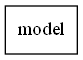

In [5]:
tf.keras.utils.plot_model(model)

## Import the decorator and define a build function

In [6]:
from functools import wraps
def plotable(silent=False):
    '''
    Used on model.build to call tf.keras.utils.plot_model
    '''
    
    def decorate(func):
        @wraps(func)
        def wrapper(self,input_shape):
            result=func(self,input_shape)

            if not silent:
                from tensorflow.keras import layers
                from IPython.display import display
                if isinstance(input_shape,(tuple,tf.TensorShape)):
                    inputs=layers.Input(input_shape[1:])
                elif isinstance(input_shape,list):
                    inputs=[layers.Input(s[1:]) for s in input_shape]
                else:
                    raise AssertionError

                outputs=self.call(inputs)
                model=tf.keras.Model(inputs=inputs,outputs=outputs)
                display(tf.keras.utils.plot_model(model,show_shapes=True))
            return result
        return wrapper
    return decorate

In [7]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.conv1=layers.Conv2D(32,kernel_size=5,strides=2)
        self.conv2=layers.Conv2D(64,kernel_size=5,strides=2)
        self.flat=layers.Flatten()
        self.dense=layers.Dense(10)
        
    def call(self,inputs):
        x=self.conv1(inputs)
        x=self.conv2(inputs)
        x=self.flat(x)
        x=self.dense(x)
        return x
    
    # The only change
    @plotable()
    def build(self,input_shape):
        super().build(input_shape)

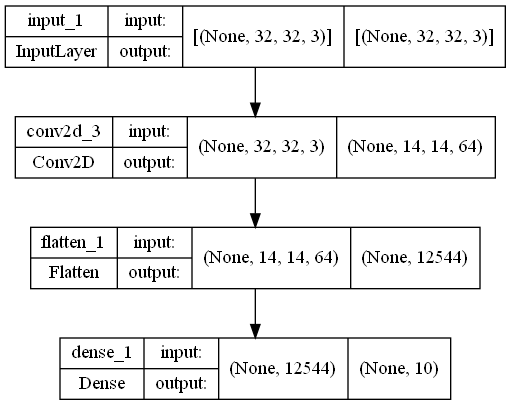

In [8]:
model=Model()
model.build((None,32,32,3))